In [24]:
#Step1:importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score


# Ridge Regression
1. Ridge regression is also known as L2 Regularization, is a technique used in linear regression to address the problem of multicollinearity among predictor variables
2. Multicollinearity coccurs when indepensent variables in a regression model are highly correlated, which can lead to unreliable & unstable estimates of regression
coefficients
3. Ridge regression mitigates this issue by adding a regularization term to the ordinary least squares(OLS) objective function, which penalizes large coefficients and thus
reduces their variance

# How Ridge Regression Addresses Overfitting and Multicollinearity?
1. Overfitting occurs when a model becomes too complex and fits noise in the training data, leading to poor generalization on new data.
2. Ridge regression combats overfitting by adding a penality term(L2) to the ordinary least squares(OLS) objective function
3. This penality discourages the modek from using large values for the coeffcients(the numbers multiplying the features)
4. It forces the model to keep these coefficients small
5. By making the coefficients smaller and closer to zero, ridge regression simplifies the model and reduces its sensitivity to random fluctuations or noise in the data.
6. This makes the model less likely to overfit and helps it perform better on new, unseen data, improving its overall accuracy and reliability.

In [25]:

# Simulating a dataset
np.random.seed(42)
# Features (5 features for houses)
n = 100  # number of samples
X = pd.DataFrame({
    'SquareFootage': np.random.normal(2000, 500, n),
    'Bedrooms': np.random.randint(1, 6, n),
    'Bathrooms': np.random.randint(1, 4, n),
    'Location': np.random.randint(1, 10, n),
    'YearBuilt': np.random.randint(1970, 2020, n)
})

In [26]:
# Simulating the target variable (house prices)
y = (300 * X['SquareFootage'] + 
     10000 * X['Location'] +
     5000 * (X['YearBuilt'] - 1970) +
     np.random.normal(0, 10000, n))  # Adding some noise

In [27]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
# Fit Ridge regression model
ridge = Ridge(alpha=50)  # alpha is the regularization parameter (lambda)
ridge.fit(X_train, y_train)

Ridge(alpha=50)

In [29]:
# Predicting on test set
y_pred = ridge.predict(X_test)

In [30]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 88998238.65


In [31]:
# Displaying the coefficients
print("Coefficients:")
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': ridge.coef_})
print(coefficients)


Coefficients:
         Feature  Coefficient
0  SquareFootage   302.690805
1       Bedrooms   495.744913
2      Bathrooms   192.096764
3       Location  9455.043286
4      YearBuilt  4953.289935


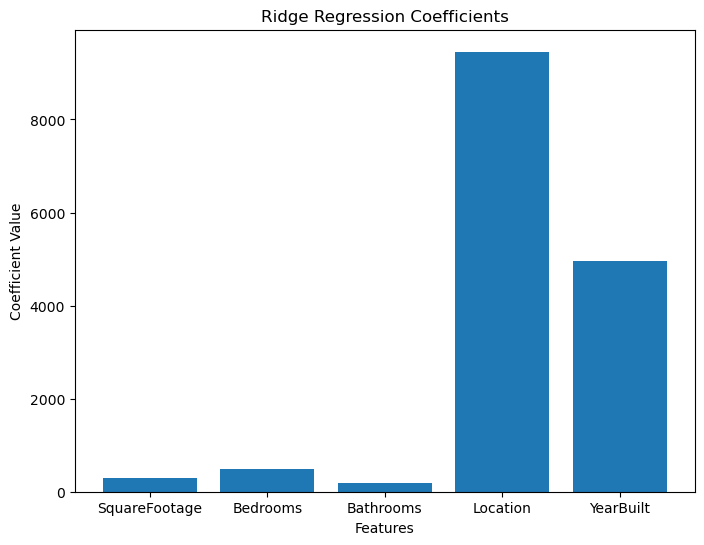

In [32]:
# Visualizing the coefficient shrinkage
plt.figure(figsize=(8, 6))
plt.bar(X.columns, ridge.coef_)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regression Coefficients')
plt.show()

# Lasso Regression

# What is lassso regression?
Lasso regression, or Least Absolute Shrinkage and Selection Operator, is a type of linear regression that performs both variable selection and regularization to enhance prediction accuracy and interpretability
It achieves this by applying a penalty (regularization) to the size of the regression coefficients, effectively shrinking some of them to zero.
This allows lasso to be useful in scenarios where we want a model that uses fewer predictors.

In [38]:
# Fit Lasso regression model
lasso = Lasso(alpha=1000)  # alpha is the regularization parameter (lambda)
lasso.fit(X_train, y_train)

Lasso(alpha=1000)

In [39]:
#predict the test set
y_pred=lasso.predict(X_test)


In [40]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 93437645.82


In [41]:
# Displaying the coefficients
print("Coefficients:")
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
print(coefficients)

Coefficients:
         Feature   Coefficient
0  SquareFootage    303.076858
1       Bedrooms    272.492557
2      Bathrooms      0.000000
3       Location  10236.188878
4      YearBuilt   4983.176595


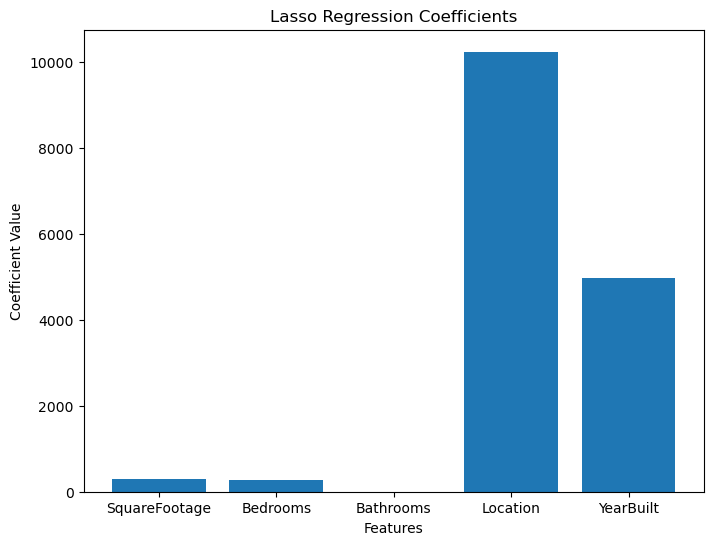

In [42]:
# Visualizing the coefficient shrinkage
plt.figure(figsize=(8, 6))
plt.bar(X.columns, lasso.coef_)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Lasso Regression Coefficients')
plt.show()
